In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
master_frame=pd.read_csv("clean_data.csv")
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
3,/organization/01games-technology,undisclosed,41250.0,01Games Technology,Games,HKG
4,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN


In [3]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88528 entries, 0 to 88527
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_permalink   88528 non-null  object 
 1   funding_round_type  88528 non-null  object 
 2   raised_amount_usd   88528 non-null  float64
 3   name                88528 non-null  object 
 4   category_list       88528 non-null  object 
 5   country_code        88528 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.1+ MB


# CHECKPOINT 2 : Funding Type Analysis

In [4]:
master_frame["funding_round_type"].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

Filtering the Data

In [5]:
l=["seed","venture","angel","private_equity"]
master_frame=master_frame.loc[(master_frame["funding_round_type"].isin(l))]

In [6]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
4,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN
5,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN


In [7]:
master_frame["funding_round_type"].unique()

array(['venture', 'seed', 'private_equity', 'angel'], dtype=object)

# Average Funding Amount

In [8]:
a=round(master_frame.groupby(by="funding_round_type")["raised_amount_usd"].mean().sort_values(ascending=False),2)

In [9]:
a

funding_round_type
private_equity    73938486.28
venture           11724222.69
angel               971573.89
seed                747827.95
Name: raised_amount_usd, dtype: float64

In [10]:
a1=pd.DataFrame(a)
a1

,raised_amount_usd
funding_round_type,
private_equity,73938486.28
venture,11724222.69
angel,971573.89
seed,747827.95


In [11]:
a2=a1[(a1["raised_amount_usd"]>=5000000) & (a1["raised_amount_usd"]<=15000000)]

In [12]:
a2.index[0]

'venture'

# Checkpoint 3: Country Analysis

In [13]:
english_countries=pd.read_csv('english_countries.csv')

In [14]:
english_countries.head()

,country_code,Official_lang
0,AUS,Yes
1,NZL,Yes
2,GBR,Yes
3,USA,Yes
4,ATG,Yes


Filter the Funding round type to Venture only

In [15]:
master_frame=master_frame.loc[master_frame["funding_round_type"]=="venture"]

In [16]:
master_frame

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
2,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
5,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN
7,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,USA
8,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,USA
...,...,...,...,...,...,...
88512,/organization/zyraz-technology,venture,7991547.0,Zyraz Technology,Biotechnology,MYS
88515,/organization/zyrra,venture,140500.0,Zyrra,E-Commerce,USA
88517,/organization/zystor,venture,8500000.0,Zystor,Biotechnology,USA
88518,/organization/zytoprotec,venture,2686600.0,Zytoprotec,Biotechnology,AUT


Merging the Data

In [17]:
top=pd.merge(master_frame,english_countries,on="country_code")

In [18]:
top1=top.groupby(by="country_code")["raised_amount_usd"].sum().sort_values(ascending=False)

In [19]:
top9=pd.DataFrame(top1)

# Top 9 Countries 

In [20]:
top9.head(9)

,raised_amount_usd
country_code,
USA,4.200680e+11
GBR,2.007281e+10
IND,1.426151e+10
CAN,9.482218e+09
SGP,2.793918e+09
IRL,1.669286e+09
AUS,1.319029e+09
NZL,4.483164e+08
ZAF,2.337131e+08


In [21]:
top9.head(3)

,raised_amount_usd
country_code,
USA,4.200680e+11
GBR,2.007281e+10
IND,1.426151e+10


Filtering country_code to Top 3 countries

In [23]:
l=['USA','GBR','IND']
top3=top.loc[(top['country_code'].isin(l))]

In [24]:
top3["country_code"].unique()

array(['IND', 'USA', 'GBR'], dtype=object)

# Checkpoint 4: Sector Analysis 1

In [25]:
mapping=pd.read_csv("mapping.csv")

In [26]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [27]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [28]:
mapping.tail()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0
687,Young Adults,0,0,0,0,0,0,0,1,0


Cleaning the mapping file

In [29]:
round(100*mapping.isnull().sum()/len(mapping),4)

category_list                              0.1453
Automotive & Sports                        0.0000
Blanks                                     0.0000
Cleantech / Semiconductors                 0.0000
Entertainment                              0.0000
Health                                     0.0000
Manufacturing                              0.0000
News, Search and Messaging                 0.0000
Others                                     0.0000
Social, Finance, Analytics, Advertising    0.0000
dtype: float64

In [30]:
mapping=mapping[~mapping["category_list"].isnull()]

In [31]:
round(100*mapping.isnull().sum()/len(mapping),4)

category_list                              0.0
Automotive & Sports                        0.0
Blanks                                     0.0
Cleantech / Semiconductors                 0.0
Entertainment                              0.0
Health                                     0.0
Manufacturing                              0.0
News, Search and Messaging                 0.0
Others                                     0.0
Social, Finance, Analytics, Advertising    0.0
dtype: float64

In [32]:
mapping["category_list"].unique()

array(['3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alter0tive Medicine', 'Alumni',
       'A0lytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'Bankin

In [33]:
mapping["category_list"]=mapping["category_list"].apply(lambda x:x.split("|")[0])

In [34]:
mapping["category_list"]

1                    3D
2           3D Printing
3         3D Technology
4            Accounting
5      Active Lifestyle
             ...       
683           Wholesale
684    Wine And Spirits
685            Wireless
686               Women
687        Young Adults
Name: category_list, Length: 687, dtype: object

In [35]:
mapping["category_list"]=mapping["category_list"].apply(lambda x:x.replace("0","na"))

In [36]:
mapping["category_list"].unique()

array(['3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alternative Medicine', 'Alumni',
       'Analytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'Bank

In [37]:
main_sector=pd.melt(mapping,id_vars=["category_list"],var_name="main_sector")

In [38]:
main_sector

,category_list,main_sector,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
...,...,...,...
6178,Wholesale,"Social, Finance, Analytics, Advertising",0
6179,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6180,Wireless,"Social, Finance, Analytics, Advertising",0
6181,Women,"Social, Finance, Analytics, Advertising",0


In [39]:
main_sector=main_sector.loc[main_sector["value"]==1]

In [40]:
main_sector

,category_list,main_sector,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1
...,...,...,...
6112,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6113,Social Television,"Social, Finance, Analytics, Advertising",1
6114,Social Travel,"Social, Finance, Analytics, Advertising",1
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [41]:
main_sector.reset_index(drop="index",inplace=True)

In [42]:
main_sector

,category_list,main_sector,value
0,Adventure Travel,Automotive & Sports,1
1,Aerospace,Automotive & Sports,1
2,Auto,Automotive & Sports,1
3,Automated Kiosk,Automotive & Sports,1
4,Automotive,Automotive & Sports,1
...,...,...,...
682,Social Recruiting,"Social, Finance, Analytics, Advertising",1
683,Social Television,"Social, Finance, Analytics, Advertising",1
684,Social Travel,"Social, Finance, Analytics, Advertising",1
685,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [43]:
main_sector.drop(["value"],axis=1,inplace=True)

C:\Users\Tanya\newanaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Checkpoint 5: Sector Analysis 2

In [44]:
m=pd.merge(main_sector,top3,on="category_list")

In [45]:
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21093 entries, 0 to 21092
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category_list       21093 non-null  object 
 1   main_sector         21093 non-null  object 
 2   company_permalink   21093 non-null  object 
 3   funding_round_type  21093 non-null  object 
 4   raised_amount_usd   21093 non-null  float64
 5   name                21093 non-null  object 
 6   country_code        21093 non-null  object 
 7   Official_lang       21093 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.4+ MB


# D1 (USA)

In [46]:
D1=m.loc[(m["country_code"]=="USA") & (m["raised_amount_usd"]>=5000000) & (m["raised_amount_usd"]<=15000000)]

In [47]:
D1.head(3)

,category_list,main_sector,company_permalink,funding_round_type,raised_amount_usd,name,country_code,Official_lang
1,Aerospace,Automotive & Sports,/organization/fly-blade,venture,6000000.0,Fly BLADE,USA,Yes
2,Aerospace,Automotive & Sports,/organization/sentera,venture,5000000.0,Sentera,USA,Yes
4,Aerospace,Automotive & Sports,/organization/spaceflight,venture,7500000.0,Spaceflight Industries,USA,Yes


In [48]:
d=pd.DataFrame(D1.groupby(by="main_sector")["raised_amount_usd"].count().sort_values(ascending=False))

In [49]:
d.rename(columns={"raised_amount_usd":"total_no_of_investments"},inplace=True)

In [50]:
d

,total_no_of_investments
main_sector,
Others,2071
Cleantech / Semiconductors,1738
Health,601
"News, Search and Messaging",552
"Social, Finance, Analytics, Advertising",528
Manufacturing,411
Entertainment,198
Automotive & Sports,40


In [51]:
s=pd.DataFrame(D1.groupby(by="main_sector")["raised_amount_usd"].sum().sort_values(ascending=False).apply(lambda x:"{:.2f}".format(x)))

In [52]:
s.rename(columns={"raised_amount_usd":"total_amount_invested"},inplace=True)

In [53]:
s

,total_amount_invested
main_sector,
Others,18506811462.00
Cleantech / Semiconductors,15955987578.00
Health,5405749916.00
"News, Search and Messaging",4770547632.00
"Social, Finance, Analytics, Advertising",4514591379.00
Manufacturing,3758864507.00
Entertainment,1702119994.00
Automotive & Sports,311202844.00


Merging the columns

In [54]:
D1=pd.merge(D1,d,on="main_sector")
D1=pd.merge(D1,s,on="main_sector")

In [55]:
D1.head(3)

,category_list,main_sector,company_permalink,funding_round_type,raised_amount_usd,name,country_code,Official_lang,total_no_of_investments,total_amount_invested
0,Aerospace,Automotive & Sports,/organization/fly-blade,venture,6000000.0,Fly BLADE,USA,Yes,40,311202844.00
1,Aerospace,Automotive & Sports,/organization/sentera,venture,5000000.0,Sentera,USA,Yes,40,311202844.00
2,Aerospace,Automotive & Sports,/organization/spaceflight,venture,7500000.0,Spaceflight Industries,USA,Yes,40,311202844.00


# D2 (GBR)

In [56]:
D2=m.loc[(m["country_code"]=="GBR") & (m["raised_amount_usd"]>=5000000) & (m["raised_amount_usd"]<=15000000)]

In [57]:
D2.head(3)

,category_list,main_sector,company_permalink,funding_round_type,raised_amount_usd,name,country_code,Official_lang
56,Automotive,Automotive & Sports,/organization/prodrive,venture,9345794.0,Prodrive,GBR,Yes
59,Automotive,Automotive & Sports,/organization/streetcar,venture,12430126.0,Streetcar,GBR,Yes
63,Automotive,Automotive & Sports,/organization/yasa-motors,venture,7576257.0,YASA Motors,GBR,Yes


In [58]:
d2=pd.DataFrame(D2.groupby(by="main_sector")["raised_amount_usd"].count().sort_values(ascending=False))

In [59]:
d2.rename(columns={"raised_amount_usd":"total_no_of_investments"},inplace=True)

In [60]:
d2

,total_no_of_investments
main_sector,
Cleantech / Semiconductors,107
Others,106
"News, Search and Messaging",31
Manufacturing,29
Entertainment,29
"Social, Finance, Analytics, Advertising",24
Health,13
Automotive & Sports,3


In [61]:
s2=pd.DataFrame(D2.groupby(by="main_sector")["raised_amount_usd"].sum().sort_values(ascending=False))

In [62]:
s2.rename(columns={"raised_amount_usd":"total_amount_invested"},inplace=True)

In [63]:
s2

,total_amount_invested
main_sector,
Cleantech / Semiconductors,942829246.0
Others,931205523.0
"News, Search and Messaging",274140008.0
Entertainment,260004421.0
Manufacturing,257049312.0
"Social, Finance, Analytics, Advertising",205607606.0
Health,112740187.0
Automotive & Sports,29352177.0


Merging the columns

In [64]:
D2=pd.merge(D2,d2,on="main_sector")
D2=pd.merge(D2,s2,on="main_sector")

In [65]:
D2.head(3)

,category_list,main_sector,company_permalink,funding_round_type,raised_amount_usd,name,country_code,Official_lang,total_no_of_investments,total_amount_invested
0,Automotive,Automotive & Sports,/organization/prodrive,venture,9345794.0,Prodrive,GBR,Yes,3,29352177.0
1,Automotive,Automotive & Sports,/organization/streetcar,venture,12430126.0,Streetcar,GBR,Yes,3,29352177.0
2,Automotive,Automotive & Sports,/organization/yasa-motors,venture,7576257.0,YASA Motors,GBR,Yes,3,29352177.0


# D3 (IND)

In [66]:
D3=m.loc[(m["country_code"]=="IND") & (m["raised_amount_usd"]>=5000000) & (m["raised_amount_usd"]<=15000000)]

In [67]:
D3.head(3)

,category_list,main_sector,company_permalink,funding_round_type,raised_amount_usd,name,country_code,Official_lang
5,Automotive,Automotive & Sports,/organization/incredible-technologies-pvt-ltd,venture,15000000.0,Incredible Technologies (CredR),IND,No
69,Design,Automotive & Sports,/organization/tonbo-imaging,venture,6400000.0,Tonbo Imaging,IND,No
191,Biotechnology,Cleantech / Semiconductors,/organization/avesthagen,venture,5530000.0,Avesthagen,IND,No


In [68]:
D3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 5 to 20962
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category_list       186 non-null    object 
 1   main_sector         186 non-null    object 
 2   company_permalink   186 non-null    object 
 3   funding_round_type  186 non-null    object 
 4   raised_amount_usd   186 non-null    float64
 5   name                186 non-null    object 
 6   country_code        186 non-null    object 
 7   Official_lang       186 non-null    object 
dtypes: float64(1), object(7)
memory usage: 13.1+ KB


In [69]:
d3=pd.DataFrame(D3.groupby(by="main_sector")["raised_amount_usd"].count().sort_values(ascending=False))

In [70]:
d3.rename(columns={"raised_amount_usd":"total_no_of_investments"},inplace=True)

In [71]:
d3

,total_no_of_investments
main_sector,
Others,74
"News, Search and Messaging",31
"Social, Finance, Analytics, Advertising",22
Entertainment,19
Cleantech / Semiconductors,14
Health,13
Manufacturing,11
Automotive & Sports,2


In [72]:
s3=pd.DataFrame(D3.groupby(by="main_sector")["raised_amount_usd"].sum().sort_values(ascending=False))

In [73]:
s3.rename(columns={"raised_amount_usd":"total_amount_invested"},inplace=True)

In [74]:
s3

,total_amount_invested
main_sector,
Others,675169507.0
"News, Search and Messaging",267118770.0
"Social, Finance, Analytics, Advertising",183606050.0
Entertainment,156150000.0
Health,114540000.0
Manufacturing,106700000.0
Cleantech / Semiconductors,105180000.0
Automotive & Sports,21400000.0


Merging the columns

In [75]:
D3=pd.merge(D3,d3,on="main_sector")
D3=pd.merge(D3,s3,on="main_sector")

In [76]:
D3.head(3)

,category_list,main_sector,company_permalink,funding_round_type,raised_amount_usd,name,country_code,Official_lang,total_no_of_investments,total_amount_invested
0,Automotive,Automotive & Sports,/organization/incredible-technologies-pvt-ltd,venture,15000000.0,Incredible Technologies (CredR),IND,No,2,21400000.0
1,Design,Automotive & Sports,/organization/tonbo-imaging,venture,6400000.0,Tonbo Imaging,IND,No,2,21400000.0
2,Biotechnology,Cleantech / Semiconductors,/organization/avesthagen,venture,5530000.0,Avesthagen,IND,No,14,105180000.0


# Total number of Investments (count) (USA)

In [77]:
d.sum()

total_no_of_investments    6139
dtype: int64

# Total amount of investment (USD) (USA)

In [78]:
s.sum()

total_amount_invested    18506811462.0015955987578.005405749916.0047705...
dtype: object

# Total number of Investments (count) (GBR)

In [79]:
d2.sum()

total_no_of_investments    342
dtype: int64

# Total amount of investment (USD) (GBR)

In [80]:
s2.sum().apply(lambda x:"{:.2f}".format(x))

total_amount_invested    3012928480.00
dtype: object

# Total number of Investments (count) (IND)

In [81]:
d3.sum()

total_no_of_investments    186
dtype: int64

# Total amount of investment (USD) (IND)

In [82]:
(s3.sum()).apply(lambda x:"{:.2f}".format(x))

total_amount_invested    1629864327.00
dtype: object

# Highest Investment recorded by a company in Top Sector(USA)

In [83]:
D1[D1['main_sector']=="Others"].groupby(by="name").sum().sort_values(by="raised_amount_usd",ascending=False).head(1)

,raised_amount_usd,total_no_of_investments
name,,
Virtustream,64300000.0,12426


# Highest Investment recorded by a company in Top Sector(GBR)

In [84]:
D2[D2['main_sector']=="Cleantech / Semiconductors"].groupby(by="name").sum().sort_values(by="raised_amount_usd",ascending=False).head(1)

,raised_amount_usd,total_no_of_investments,total_amount_invested
name,,,
EUSA Pharma,35600000.0,321,2.828488e+09


# Highest Investment recorded by a company in Top Sector(IND)

In [85]:
D3[D3['main_sector']=="Others"].groupby(by="name").sum().sort_values(by="raised_amount_usd",ascending=False).head(1)

,raised_amount_usd,total_no_of_investments,total_amount_invested
name,,,
FirstCry.com,39000000.0,222,2.025509e+09


# Second Highest Investment recorded by a company in Top Sector(USA)

In [86]:
D1[D1['main_sector']=="Cleantech / Semiconductors"].groupby(by="name").sum().sort_values(by="raised_amount_usd",ascending=False).head(1)

,raised_amount_usd,total_no_of_investments
name,,
Tigo Energy,68739496.0,13904


# Second Highest Investment recorded by a company in Top Sector(GBR)

In [87]:
D2[D2['main_sector']=="Others"].groupby(by="name").sum().sort_values(by="raised_amount_usd",ascending=False).head(1)

,raised_amount_usd,total_no_of_investments,total_amount_invested
name,,,
Electric Cloud,37000000.0,424,3.724822e+09


# Second Highest Investment recorded by a company in Top Sector(IND)

In [88]:
D3[D3['main_sector']=="News, Search and Messaging"].groupby(by="name").sum().sort_values(by="raised_amount_usd",ascending=False).head(1)

,raised_amount_usd,total_no_of_investments,total_amount_invested
name,,,
GupShup,33000000.0,93,801356310.0


# PLOTTING

In [89]:
m=pd.read_csv("clean_data.csv")
m.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
3,/organization/01games-technology,undisclosed,41250.0,01Games Technology,Games,HKG
4,/organization/0ndine-biomedical-inc,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,CAN


# PLOT 1

In [90]:
lst=["venture","seed","private_equity"]
m=m.loc[(m["funding_round_type"].isin(lst))]

Text(0.5, 1.0, 'Average Amount Of investment')

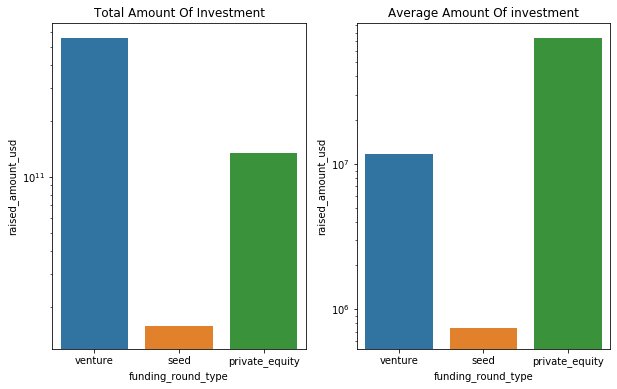

In [91]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.yscale("log")
sb.barplot(x="funding_round_type",y="raised_amount_usd",data=m,estimator=np.sum,ci=False)
plt.title("Total Amount Of Investment")

plt.subplot(122)
plt.yscale("log")
sb.barplot(x="funding_round_type",y="raised_amount_usd",data=m,estimator=np.mean,ci=False) 
plt.title("Average Amount Of investment")

# PLOT 2

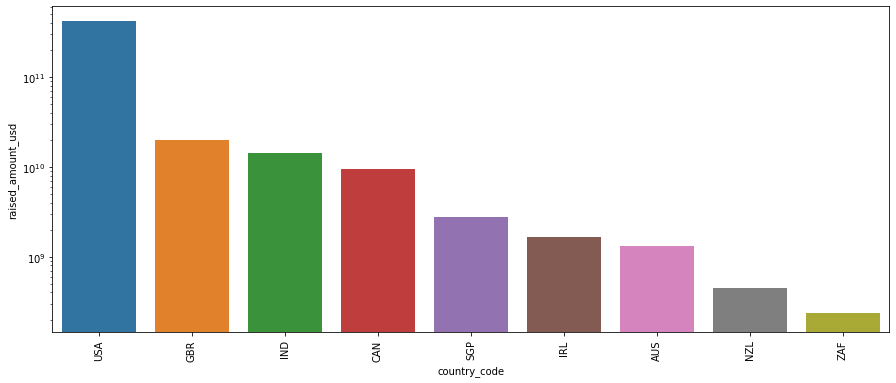

In [92]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.yscale("log")
t=top9.head(9)
sb.barplot(x=t.index,y="raised_amount_usd",data=t)

# PLOT 3

Text(0.5, 1.0, 'Country 3 (IND)')

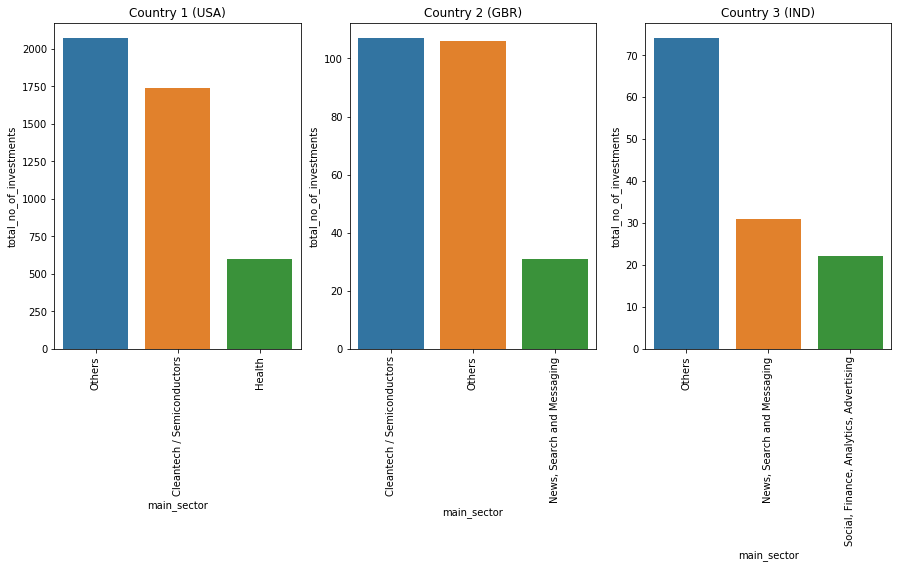

In [93]:
plt.figure(figsize=(15,6))
plt.subplot(131)
a=d.head(3)
plt.xticks(rotation=90)
sb.barplot(x=a.index,y="total_no_of_investments",data=a)
plt.title("Country 1 (USA)")

plt.subplot(132)
a2=d2.head(3)
plt.xticks(rotation=90)
sb.barplot(x=a2.index,y="total_no_of_investments",data=a2)
plt.title("Country 2 (GBR)")

plt.subplot(133)
a3=d3.head(3)
plt.xticks(rotation=90)
sb.barplot(x=a3.index,y="total_no_of_investments",data=a3)
plt.title("Country 3 (IND)")